# WELCOME

In [35]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)
from sklearn.linear_model import LinearRegression
pd.options.display.float_format = '{:.3f}'.format
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
import pickle
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)
from sklearn.linear_model import LinearRegression
pd.options.display.float_format = '{:.3f}'.format
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.ensemble import RandomForestRegressor

In [19]:
df = pd.read_csv("final_scout_not_dummy.csv")

# Feature Engineering

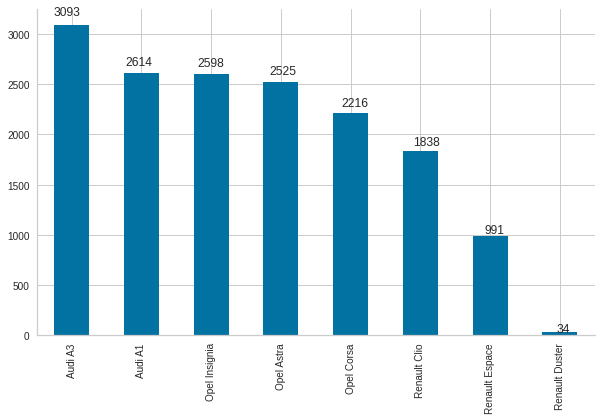

In [20]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))

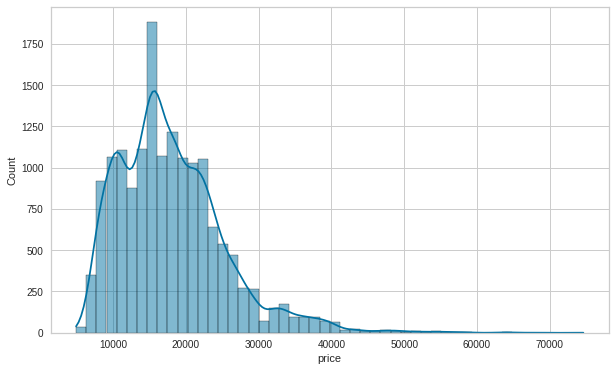

In [21]:
sns.histplot(df.price, bins=50, kde=True);

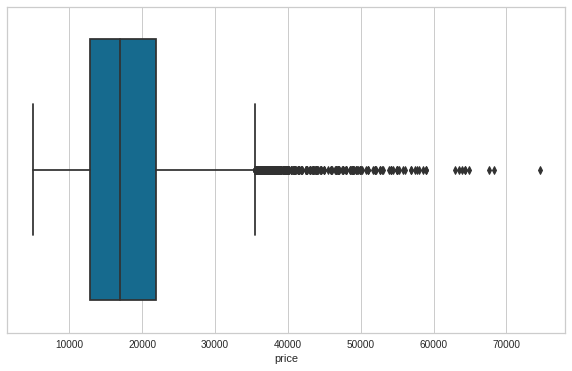

In [22]:
sns.boxplot(df.price);

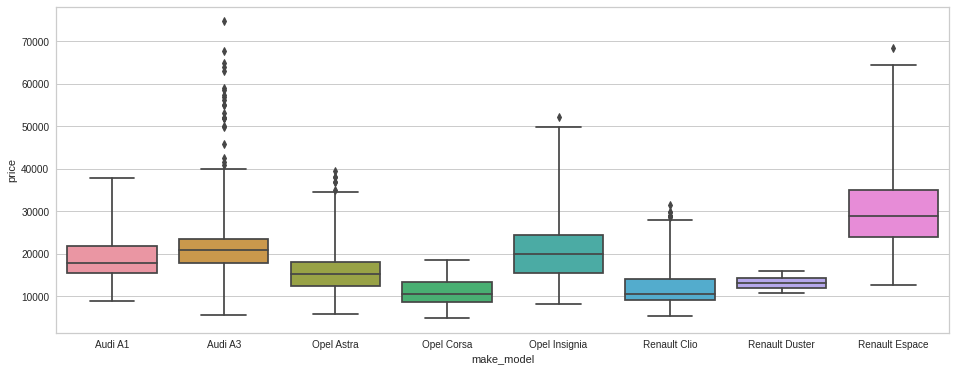

In [23]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

# Get dummies

In [24]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_")) 
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)
df = pd.get_dummies(df, drop_first =True)

# Data Pre-Processing

In [25]:
df2 = df[~(df.price>35000)]
df2=df2.reset_index(drop=True)
df2

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,99.000,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,129.000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,99.000,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,99.000,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,109.000,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,

In [26]:
X = df2.drop(columns = "price")
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [27]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train) # overfitting var mı yok mu kıyaslamak için
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

#Decision Tree

In [36]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=None,min_samples_leaf=7,min_samples_split=2,splitter='best')

In [37]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=7)

In [38]:
train_val(tuned_hyper_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.969,0.937
mae,686.418,993.546
mse,1170761.404,2359468.822
rmse,1082.017,1536.056


## Random Forest

In [28]:
regres = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [29]:
random_hyper_model= RandomForestRegressor(n_estimators= 500,max_depth=None,min_samples_leaf=2,min_samples_split=3,max_features='auto')

In [30]:
random_hyper_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=3, n_estimators=500)

In [31]:
train_val(random_hyper_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.989,0.960
mae,383.485,781.109
mse,404862.946,1482079.095
rmse,636.288,1217.407


In [39]:
y_predd=random_hyper_model.predict(X_test)
my_dict={"Actual":y_test,"Pred":y_predd,"Residual":y_test-y_predd}
compare=pd.DataFrame(my_dict)
compare.sample(20)

,Actual,Pred,Residual
12004,22590,23051.287,-461.287
12633,29561,32497.351,-2936.351
10403,10990,10985.349,4.651
3652,21900,20531.644,1368.356
1524,16300,15617.195,682.805
15297,31900,29322.696,2577.304
12555,26668,27387.700,-719.700
4016,19600,18404.548,1195.452
7648,26900,22210.373,4689.627
5302,23900,24484.652,-584.652


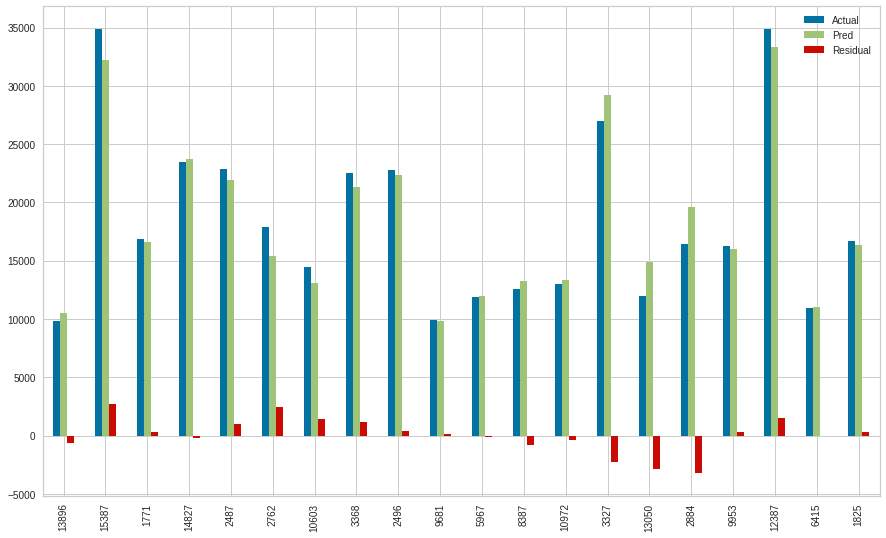

In [40]:
compare.sample(20).plot(kind="bar",figsize=(15,9));

### Cros - Validation

In [41]:
scores=cross_validate(random_hyper_model, X_train,y_train,scoring=["r2","neg_mean_absolute_error","neg_mean_squared_error","neg_root_mean_squared_error"],cv=10)
pd.DataFrame(scores)

KeyboardInterrupt: ignored

In [ ]:
pd.DataFrame(scores).iloc[:,2:].mean()

## Prediction Error

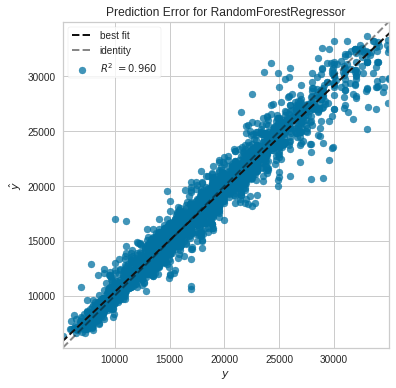

In [42]:
visualizer=PredictionError(random_hyper_model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show();


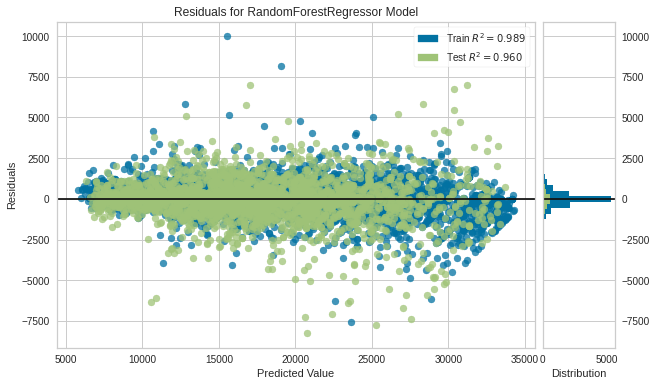

In [43]:
visualizer=ResidualsPlot(random_hyper_model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show();

### Feature Importance

In [44]:
FI=pd.DataFrame(index=X.columns, data=random_hyper_model.feature_importances_, columns=["Feature Importance"]).sort_values("Feature Importance",ascending=False)

In [45]:
FI

,Feature Importance
hp_kW,0.485
age,0.144
km,0.119
make_model_Renault Espace,0.056
Gears,0.033
Gearing_Type_Manual,0.019
make_model_Audi A3,0.017
make_model_Opel Astra,0.016
Displacement_cc,0.014
Weight_kg,0.013


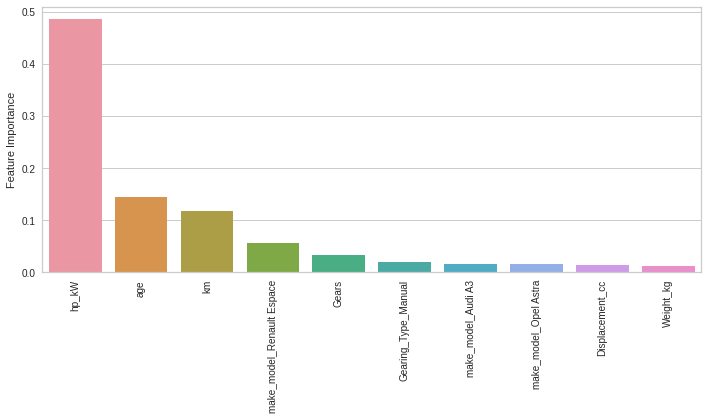

In [46]:
sns.barplot(x=FI.head(10).index,y="Feature Importance", data=FI.head(10))
plt.xticks(rotation=90)
plt.tight_layout()

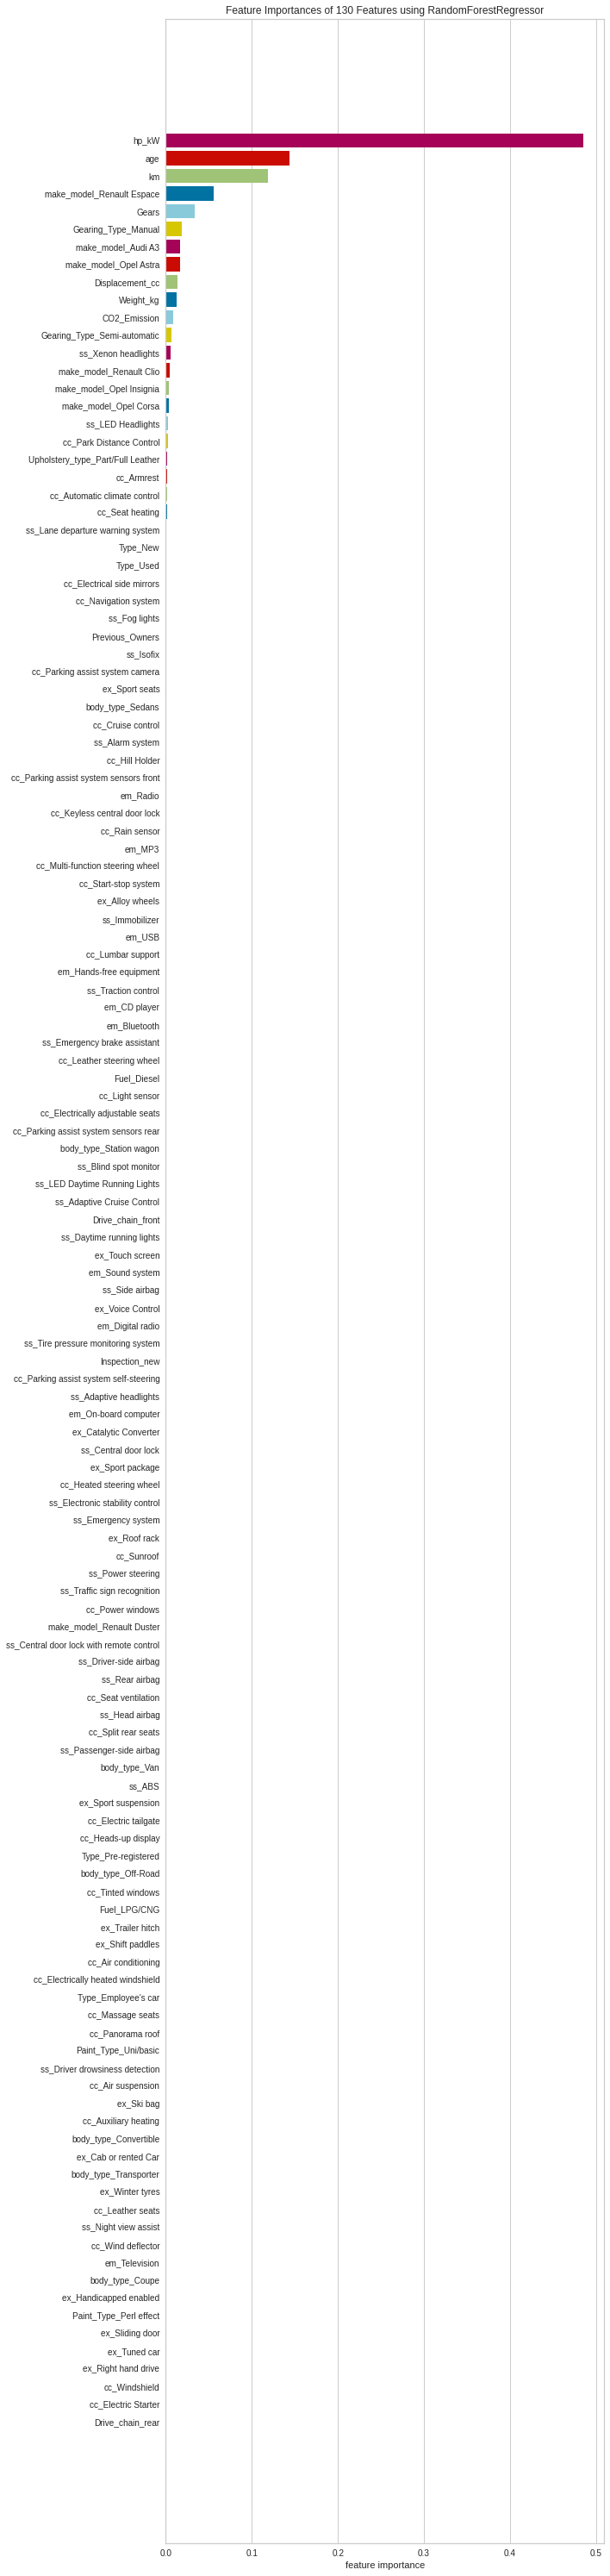

In [47]:
viz=FeatureImportances(random_hyper_model,labels=df2.drop(columns="price").columns, relative=False)
visualizer=RadViz(size=(720,3000))
viz.fit(X_train,y_train)
viz.show();

In [62]:
df=pd.read_csv("final_scout_not_dummy.csv")

In [63]:
df_final=df[["make_model","km","hp_kW","age","price","Gearing_Type"]]

In [64]:
df_final=pd.get_dummies(df_final)

In [65]:
df_final

,km,hp_kW,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,56013.000,66.000,3.000,15770,1,0,0,0,0,0,0,0,1,0,0
1,80000.000,141.000,2.000,14500,1,0,0,0,0,0,0,0,1,0,0
2,83450.000,85.000,3.000,14640,1,0,0,0,0,0,0,0,1,0,0
3,73000.000,66.000,3.000,14500,1,0,0,0,0,0,0,0,1,0,0
4,16200.000,66.000,3.000,16790,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15904,1647.363,147.000,0.000,39950,0,0,0,0,0,0,0,1,1,0,0
15905,9900.000,165.000,0.000,39885,0,0,0,0,0,0,0,1,1,0,0
15906,15.000,146.000,0.000,39875,0,0,0,0,0,0,0,1,1,0,0
15907,10.000,147.000,0.000,39700,0,0,0,0,0,0,0,1,1,0,0


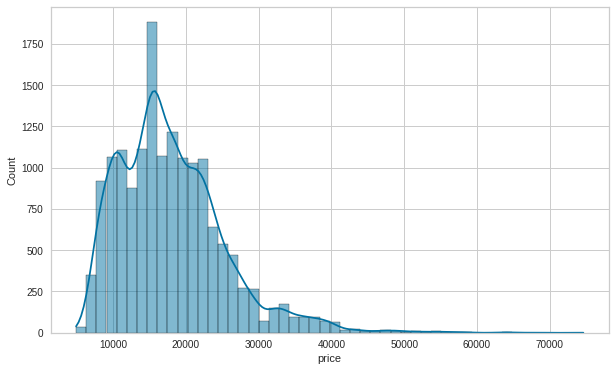

In [66]:
sns.histplot(df_final.price, bins=50, kde=True);

In [67]:
df_final= df_final[~(df_final.price>35000)]

In [68]:
df_final.to_csv("last_data.csv", index=False)

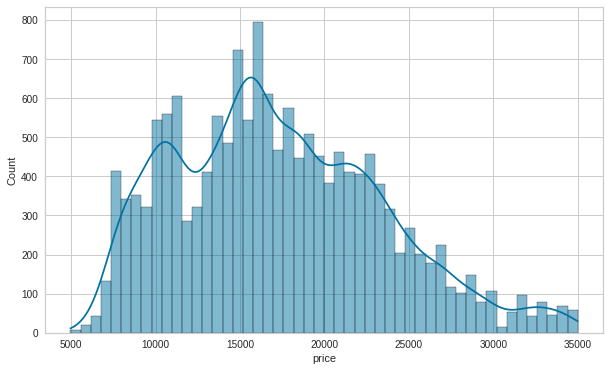

In [69]:
sns.histplot(df_final.price, bins=50, kde=True);

In [70]:
X=df_final.drop(columns=["price"])
y=df_final.price


In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

#Random_F

In [72]:
random_f= RandomForestRegressor()

In [73]:
parameters={"n_estimators":[200,500],
            "max_depth" : [None,4,5,6,7],
           "min_samples_leaf":[2,3,4],
           "min_samples_split" : [3,5,8,9],
            "max_features":["auto",X.shape[1]/3,2]
            }

In [74]:
random_model=GridSearchCV(random_f,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [75]:
random_model.fit(X_train,y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=-2635701.291 total time=   5.7s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=-2450090.088 total time=   4.5s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=-2579850.802 total time=   3.9s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=500;, score=-2616082.154 total time=   9.6s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=500;, score=-2460536.892 total time=   6.2s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=500;, score=-2578706.879 total time=   7.4s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 5, 6, 7],
                         'max_features': ['auto', 4.666666666666667, 2],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [3, 5, 8, 9],
                         'n_estimators': [200, 500]},
             scoring='neg_mean_squared_error', verbose=3)

In [76]:
random_model.best_params_

{'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 500}

In [77]:
random_final_model= RandomForestRegressor(n_estimators= 500,max_depth=None,min_samples_leaf=2,min_samples_split=8,max_features=2)

In [78]:
random_final_model.fit(X_train,y_train)

RandomForestRegressor(max_features=2, min_samples_leaf=2, min_samples_split=8,
                      n_estimators=500)

In [79]:
train_val(random_final_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.959,0.941
mae,819.854,1003.352
mse,1533398.649,2200081.605
rmse,1238.305,1483.267


In [81]:
random_fnl_mdl= RandomForestRegressor(n_estimators= 200,max_depth=None,min_samples_leaf=2,min_samples_split=8,max_features='auto')

In [82]:
random_fnl_mdl.fit(X,y)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=8, n_estimators=200)

# Decision Tree

In [83]:
Decisiom_T= DecisionTreeRegressor(random_state=42)

In [84]:
parameters1={"splitter":["best","random"],
            "max_depth" : [None,1,3,5],
           "min_samples_leaf":[1,2,3,4,5,6,7],
           "min_samples_split" : [2,3,5,6,7,8,9] }

In [85]:
tuning_model=GridSearchCV(Decisiom_T,param_grid=parameters1,scoring='neg_mean_squared_error',cv=5,verbose=3)

In [86]:
tuning_model.fit(X_train,y_train)

Fitting 5 folds for each of 392 candidates, totalling 1960 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-3499563.149 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-3489966.880 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-3334273.722 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-3816196.490 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-3530130.232 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-3198315.151 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-3336857.214 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_spl

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 1, 3, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [87]:
tuning_model.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'splitter': 'random'}

In [88]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=8,splitter='random')

In [89]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=8,
                      splitter='random')

In [90]:
train_val(tuned_hyper_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.951,0.934
mae,892.797,1053.457
mse,1839226.383,2468863.631
rmse,1356.181,1571.262
